In [ ]:
!pip install transformers
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 16.0 MB/s 
     |████████████████████████████████| 6.6 MB 78.7 MB/s 
     |████████████████████████████████| 120 kB 74.9 MB/s 


In [ ]:
df = pd.read_csv('Dataset/dataset_labeling_tiktok.csv') #Read dataset
df.to_numpy()
df

,Unnamed: 0,Unnamed: 0.1,user,tweet,stem,label,tokenizing
0,0,0,urebabeyy,buat yg gangerti itu dokterny lg meragain bngu...,gangerti dokterny lg meragain bngunin org ping...,-1,"['buat', 'yg', 'gangerti', 'itu', 'dokterny', ..."
1,1,1,14fbrary,bisa bisanyðŸ—¿,bisany,0,"['bisa', 'bisany']"
2,2,2,oreomuffinnn,Let me correct: bukan bangunin orng pingsan ta...,let me correct bangunin orng pingsan lancar si...,-1,"['let', 'me', 'correct', 'bukan', 'bangunin', ..."
3,3,3,urebabeyy,yup tapi jg bisa ka kata mamaku yg perawat bis...,yup ka mama awat bangunin org pingsan,-1,"['yup', 'tapi', 'jg', 'bisa', 'ka', 'kata', 'm..."
4,4,4,pseudoholiday,perbaiki lgi : jalan nafas kak bukan sirkulasi...,baik lgi jalan nafas kak sirkulasi nafas,1,"['perbaiki', 'lgi', 'jalan', 'nafas', 'kak', '..."
...,...,...,...,...,...,...,...
1996,1996,1996,punkwithlove,ðŸ˜´,NaN,0,[]
1997,1997,1997,jayasaputra9999,@san_ziz1,NaN,0,[]
1998,1998,1998,paizzzzzzz0,hehehehðŸ—¿ðŸ—¿ðŸ—¿ðŸ¤¨ðŸ¤¨ðŸ¤¨ðŸ¤¨ðŸ—¿ðŸ—¿ðŸ—¿,heheheh,0,['heheheh']
1999,1999,1999,jancoksyap,@nflbae,NaN,0,[]


In [24]:
# Setup X & y 
X = list()
y = list()

for i, r in df.iterrows():
    X.append(str(r['stem']))
    y.append(r['label'])
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
# Visualisasi Train Data
train_data = {'stem':list(), 'label':list()}
for xt in range(len(X_train)):
    train_data['stem'].append(X_train[xt])
    train_data['label'].append(y_train[xt])
train_data = pd.DataFrame(train_data)
train_data

,stem,label
0,bener tuh pmr latih pas pkl pkl dibiarin aja t...,0
1,banget,0
2,dokter kelas meme,0
3,suntik sakit tau kaya gigit gigi buaya,0
4,sehat selu dok,1
...,...,...
1495,gigi bgs,0
1496,ad d btp blok m,0
1497,banget,0
1498,nonton full psti paham,0


In [26]:
## Menghitung setiap jumlah Negative, Neutral dan Positive yang ada di data train
train_label_positive = 0
train_label_negative = 0
train_label_neutral = 0 #

train_datasets = list()

for index, row in train_data.iterrows():
    if(row['stem'] != ''):
        if(row['label'] == -1):
            train_label_negative += 1
        elif(row['label'] == 0):
            train_label_neutral += 1 #
        else:
            train_label_positive  += 1

        ## Append array train_data
        to_append = {
            'stemming_tweet' : row['stem'],
            'label' : row['label']
        }
        train_datasets.append(to_append)
print('============================ TRAIN DATA ===============================')     
print('Total Label Positive = ', train_label_positive)
print('Total Label Neutral = ', train_label_neutral) #
print('Total Label Negative = ', train_label_negative)
print('=======================================================================')

============================ TRAIN DATA ===============================
Total Label Positive =  218
Total Label Neutral =  1137
Total Label Negative =  145


In [27]:
# Visualisasi Test Data
test_data = {'stem':list(), 'label':list()}
for xt in range(len(X_test)):
    test_data['stem'].append(X_test[xt])
    test_data['label'].append(y_test[xt])
test_data = pd.DataFrame(test_data)
test_data

,stem,label
0,sehat dok,1
1,sihat sllu doc st hdr support n done follow,0
2,diapain bg abis,0
3,buka cabang indramayu,0
4,salfok pp masya allah cntik bnget,0
...,...,...
496,lokasi mana,0
497,wibu ya,0
498,tangerang yah praktek,0
499,nyembuhin bell spasly,0


In [28]:
## Menghitung setiap jumlah Negative, Neutral dan Positive yang ada di data test
test_label_positive = 0
test_label_negative = 0
test_label_neutral = 0

test_datasets = list()

for index, row in test_data.iterrows():
    if(row['stem'] != ''):
        if(row['label'] == -1):
            test_label_negative += 1
        elif(row['label'] == 0):
            test_label_neutral += 1 #
        else:
            test_label_positive  += 1

        ## Append array train_data
        to_append = {
            'stemming_tweet' : row['stem'],
            'label' : row['label']
        }
        test_datasets.append(to_append)
print('============================ Test DATA ===============================')     
print('Total Label Positive = ', test_label_positive)
print('Total Label Negative = ', test_label_negative)
print('Total Label Neutral = ', test_label_neutral) #
print('=======================================================================')

============================ Test DATA ===============================
Total Label Positive =  81
Total Label Negative =  49
Total Label Neutral =  371


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer     = TfidfVectorizer(norm='l2') # Membuat TF ID-F Vectorizer
X_train_corpus = vectorizer.fit_transform(X_train) # Mencari vocabulary
feature_names  = vectorizer.get_feature_names_out() # Mendapatkan Feature Names matrix
feature_names

array(['aaaa', 'aahhhh', 'aapp', ..., 'zada', 'zbaru', 'zein'],
      dtype=object)

In [30]:
X_test_corpus = vectorizer.transform(X_test) # Masukan corpus test ke matrix train

df_vec_test = pd.DataFrame(X_test_corpus.toarray(), columns=feature_names)

## Algoritma Naive Bayes

In [31]:
model = GaussianNB()
model.fit(X_train_corpus.toarray(), y_train)
y_pred= model.predict((X_test_corpus.toarray()))
preds = y_pred.tolist()

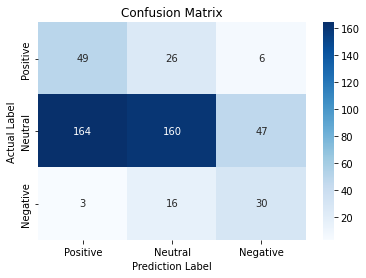

In [32]:
 # confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
    
Confusion_matrix = confusion_matrix(y_test, y_pred, labels=[1,0,-1])
class_label      = ['Positive', 'Neutral','Negative']
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)
sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [33]:
_accuracy   = accuracy_score(y_test, y_pred)
_precission = precision_score(y_test, y_pred, average='micro')
_recall     = recall_score(y_test, y_pred, average='micro')
_fscore     = f1_score(y_test, y_pred, average='micro')

print('Accuracy Score =', "{:.2f}".format(_accuracy))
print('Precission =', "{:.2f}".format(_precission))
print('Recall =', "{:.2f}".format(_recall))
print('F-Score =', "{:.2f}".format(_fscore))

Accuracy Score = 0.48
Precission = 0.48
Recall = 0.48
F-Score = 0.48


In [34]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.36      0.61      0.45        49
           0       0.79      0.43      0.56       371
           1       0.23      0.60      0.33        81

    accuracy                           0.48       501
   macro avg       0.46      0.55      0.45       501
weighted avg       0.66      0.48      0.51       501



In [35]:
#persentase label hasil prediksi menggunakan algoritma Naive Bayes
df_result_nb = pd.DataFrame({'prediksi':y_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_nb = pd.DataFrame(df_result_nb['prediksi'].value_counts()/df_result_nb['prediksi'].count()*100)
df_persen_nb = df_persen_nb.rename(index={-1:'Negative', 0:'Neutral', 1:'Positive'})
df_persen_nb

,prediksi
Positive,43.11%
Neutral,40.32%
Negative,16.57%


In [41]:
print('Label', df_persen_nb.index[0] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_nb['prediksi'][0]), '%')
print('Label', df_persen_nb.index[1] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_nb['prediksi'][1]), '%')
print('Label', df_persen_nb.index[2] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_nb['prediksi'][2]), '%')

Label Positive memiliki persentase sebesar 43.11 %
Label Neutral memiliki persentase sebesar 40.32 %
Label Negative memiliki persentase sebesar 16.57 %


In [44]:
print('Prediksi menggunakan algoritma Naive Bayes menghasilkan label', df_persen_nb['prediksi'].idxmax() ,'memiliki persentase terbanyak sebesar', '{:,.2f}'.format(max(df_persen_nb['prediksi']), 2), '%')

Prediksi menggunakan algoritma Naive Bayes menghasilkan label Positive memiliki persentase terbanyak sebesar 43.11 %


## Algoritma SVM

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Menggunakan GridSearch dengan fold 6 (melalui cv = 6)
param_grid = {'C': [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv = 6)
clf.fit(X_train_corpus.toarray(), y_train)
pred = clf.predict(X_test_corpus.toarray())
model.fit(X_train_corpus.toarray(), y_train)
y_pred= model.predict((X_test_corpus.toarray()))

In [45]:
print(clf.best_estimator_)

SVC(C=100.0, class_weight='balanced', gamma=0.005)


In [46]:
_accuracy   = accuracy_score(y_test, pred)
_precission = precision_score(y_test, pred, average='micro')
_recall     = recall_score(y_test, pred, average='micro')
_fscore     = f1_score(y_test, pred, average='micro')

print('Accuracy Score =', "{:.2f}".format(_accuracy))
print('Precission =', "{:.2f}".format(_precission))
print('Recall =', "{:.2f}".format(_recall))
print('F-Score =', "{:.2f}".format(_fscore))

Accuracy Score = 0.92
Precission = 0.92
Recall = 0.92
F-Score = 0.92


In [47]:
# Menghitung nilai akurasi dari klasifikasi SVM 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.82      0.84      0.83        49
           0       0.95      0.94      0.95       371
           1       0.85      0.88      0.86        81

    accuracy                           0.92       501
   macro avg       0.87      0.89      0.88       501
weighted avg       0.92      0.92      0.92       501



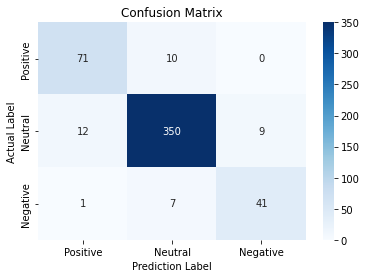

In [48]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
    
Confusion_matrix = confusion_matrix(y_test, pred, labels=[1,0,-1])
class_label      = ['Positive', 'Neutral','Negative']
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)
sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [49]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_svm = pd.DataFrame({'prediksi':pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_svm['prediksi'].value_counts()/df_result_svm['prediksi'].count()*100)
df_persen_svm = df_persen_svm.rename(index={-1:'Negative', 0:'Neutral', 1:'Positive'})
df_persen_svm

,prediksi
Neutral,73.25%
Positive,16.77%
Negative,9.98%


In [53]:
print('Label', df_persen_svm.index[0] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_svm['prediksi'][0]), '%')
print('Label', df_persen_svm.index[1] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_svm['prediksi'][1]), '%')
print('Label', df_persen_svm.index[2] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_svm['prediksi'][2]), '%')

Label Neutral memiliki persentase sebesar 73.25 %
Label Positive memiliki persentase sebesar 16.77 %
Label Negative memiliki persentase sebesar 9.98 %


In [54]:
print('Prediksi menggunakan algoritma SVM menghasilkan label', df_persen_svm['prediksi'].idxmax() ,'memiliki persentase terbanyak sebesar', '{:,.2f}'.format(max(df_persen_svm['prediksi']), 2), '%')

Prediksi menggunakan algoritma SVM menghasilkan label Neutral memiliki persentase terbanyak sebesar 73.25 %


## Persentase label

In [ ]:
#persentase label dataset
pd.options.display.float_format = '{:,.2f}%'.format
df_persen = pd.DataFrame(round((df['label'].value_counts()/df['label'].count())*100, 2))
df_persen = df_persen.rename(index={-1:'Negative', 0:'Neutral', 1:'Positive'})
df_persen = df_persen.rename(columns={'label':'Persentase'})
df_persen

,Persentase
Neutral,75.36%
Positive,14.94%
Negative,9.70%


In [23]:
print('Label', df_persen.index[0] ,'memiliki persentase sebesar', df_persen['Persentase'][0], '%')
print('Label', df_persen.index[1] ,'memiliki persentase sebesar', df_persen['Persentase'][1], '%')
print('Label', df_persen.index[2] ,'memiliki persentase sebesar', df_persen['Persentase'][2], '%')

Label Neutral memiliki persentase sebesar 75.36 %
Label Positive memiliki persentase sebesar 14.94 %
Label Negative memiliki persentase sebesar 9.7 %


In [ ]:
print('Label', df_persen['Persentase'].idxmax() ,'memiliki persentase terbanyak sebesar', max(df_persen['Persentase']), '%')

Label Neutral memiliki persentase terbanyak sebesar 75.36 %
